In [1]:
#--------Import packages
#--------For Netcdf manipulation
import statsmodels.tsa.stattools
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

In [2]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_ra.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [3]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')
sam_df = sam_df.drop(["Years", "Months"], axis=1)

# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [4]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["SIV"] = vol_df["SIV"]

In [5]:
df_new

,Dates,SAM,SIV
0,2007-05-01,-1.02,923.753208
1,2008-05-01,-0.66,691.286389
2,2009-05-01,-0.14,767.113866
3,2010-05-01,1.51,847.812585
4,2011-05-01,1.37,879.269180
...,...,...,...
92,2014-10-01,1.32,706.945553
93,2015-10-01,-0.66,875.894342
94,2016-10-01,-0.89,1023.412510
95,2017-10-01,-0.64,1048.017796


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols
dir = '/Users/fridaperez/Developer/repos/local_repo/pub_plots/Ross_amudsen/'
from astsadata import *

def month_ccf_sam(df):
    x = [5,6,7,8,9,10]
    df_selmons = []
    df_vol_selmons = []
    df_sam_selmons = []
    cdfs = []
    df_list = []
    ind0 = 0
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SAM, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SAM #
        df_sam_selmon = df_selmon[['Dates', 'SAM']]
        df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
        df_sam_selmon = df_sam_selmon.set_index(['Dates'])
        df_sam_selmons.append(df_sam_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row =0 if i <= 2 else 1
            col = i if i <=2 else i-3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_sam_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_sam_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SAM (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0],3), x = .95, y = 0.05, transform = axes[row, col].transAxes, ha = 'right') #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


/Users/fridaperez/miniconda3/envs/basemap_stable/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


         CCF
0   0.112225
1   0.244710
2  -0.227620
3  -0.093028
4  -0.209811
5   0.077779
6   0.233462
7  -0.028386
8   0.020811
9  -0.210909
10  0.059196
11 -0.003969
         CCF
0   0.044889
1  -0.300885
2  -0.261728
3  -0.065501
4   0.379948
5   0.181999
6   0.030003
7  -0.357838
8  -0.266156
9  -0.028547
10  0.181995
11  0.181592
12  0.025764
13 -0.170573
14 -0.207405
15  0.074175
16  0.075101
         CCF
0  -0.206596
1  -0.145006
2   0.307375
3  -0.135666
4   0.253752
5  -0.199591
6  -0.042998
7  -0.006331
8   0.167793
9  -0.139923
10  0.060000
11 -0.060805
12 -0.050821
13  0.074561
14  0.029420
15 -0.017785
16 -0.006596
         CCF
0   0.006209
1   0.132488
2   0.075851
3   0.038619
4  -0.203519
5   0.056993
6   0.082191
7   0.182878
8   0.095178
9  -0.040277
10 -0.192679
11 -0.049004
12  0.040579
13  0.011349
14  0.048512
15  0.000418
16  0.006373
         CCF
0  -0.099024
1   0.290655
2   0.234566
3  -0.116021
4  -0.070346
5   0.232362
6   0.131435
7   0.351865
8   0.253837

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/7921234.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/7921234.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/7921234.py:28: SettingWithCopyWarning: 
A value is trying to be

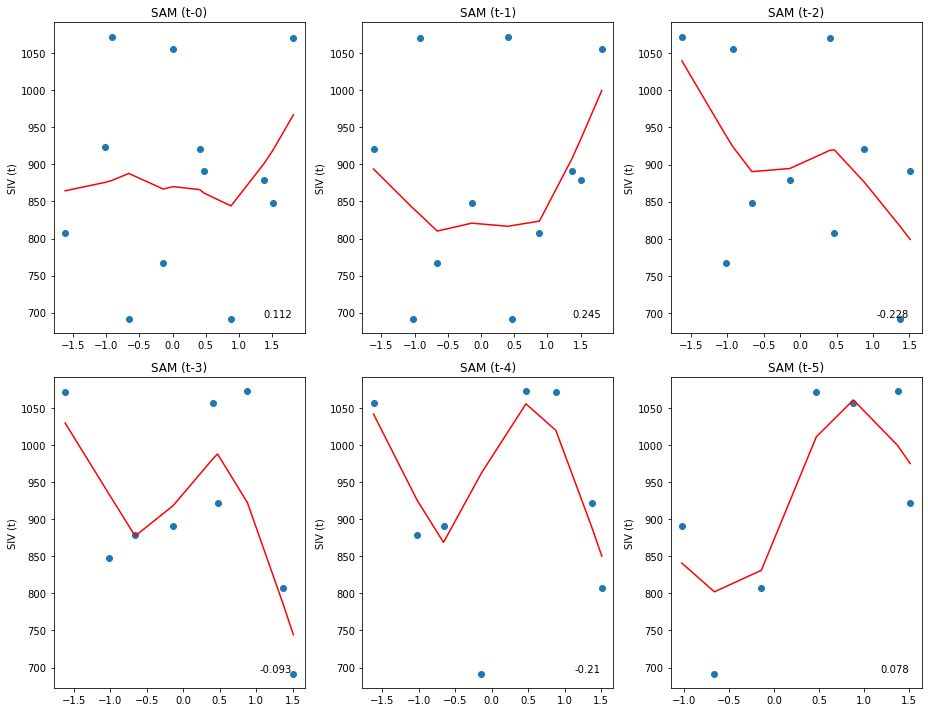

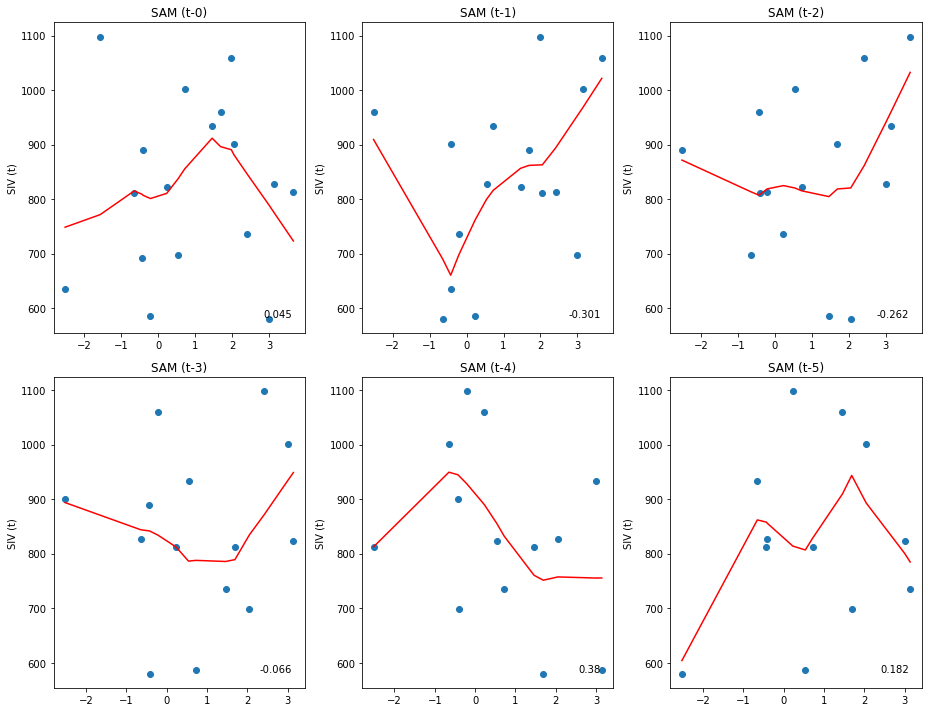

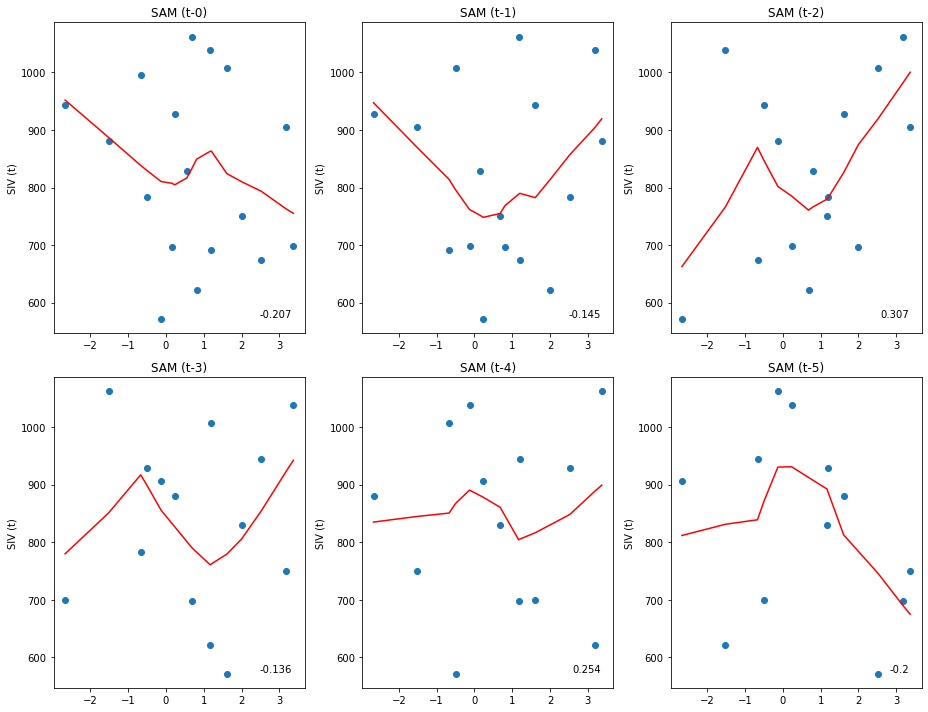

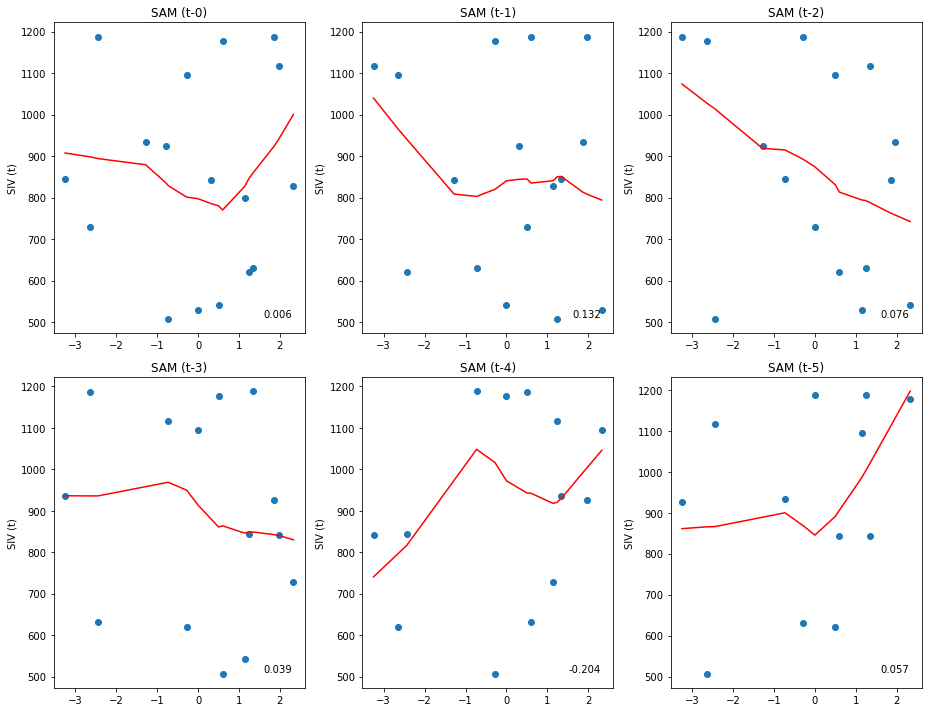

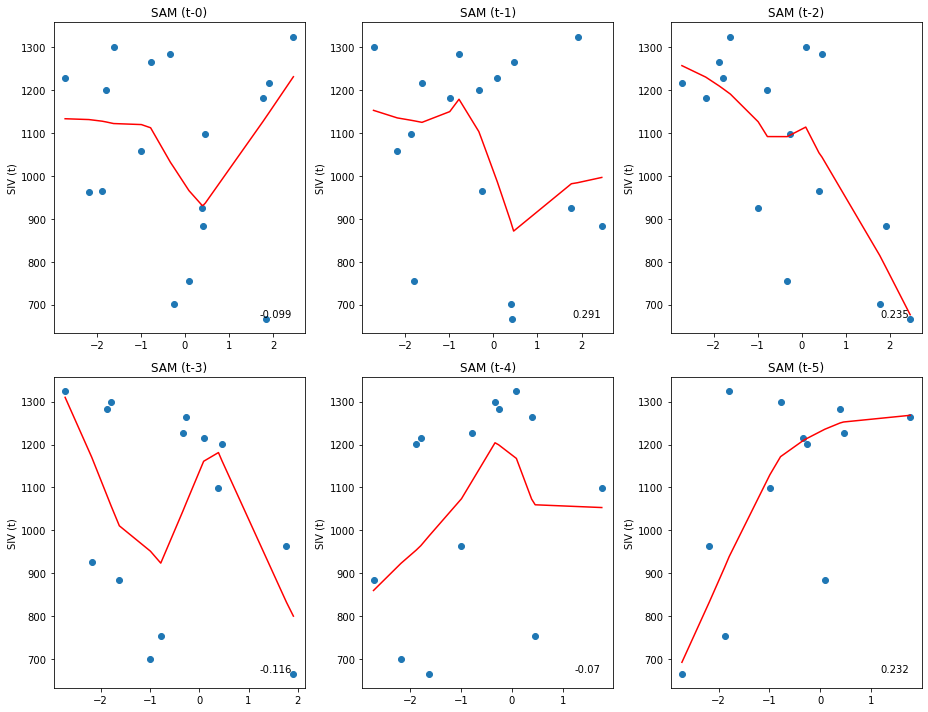

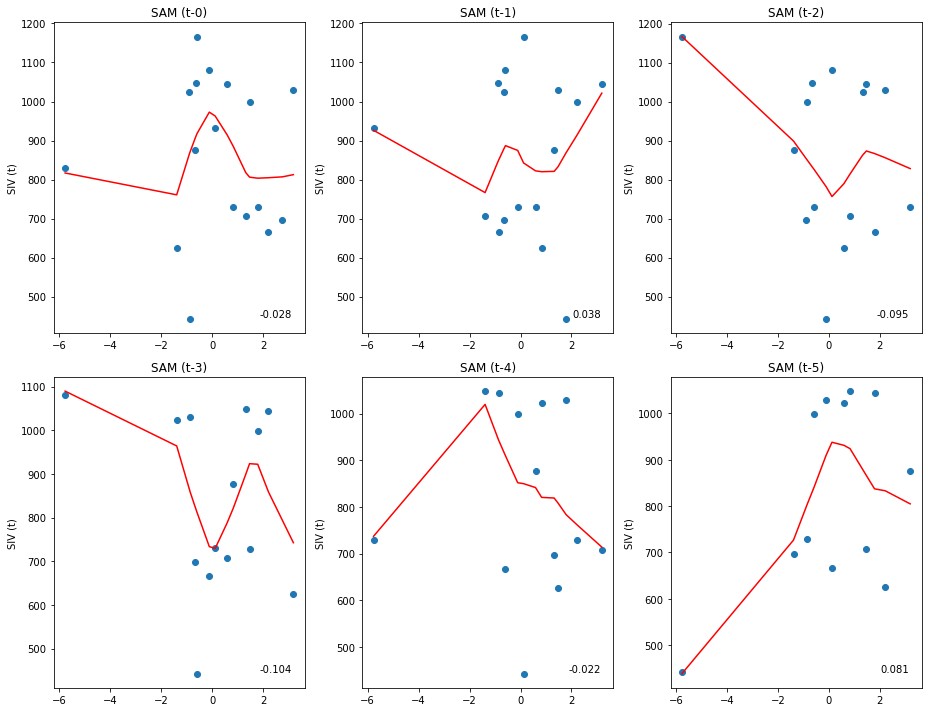

In [7]:
month_ccf_sam(df_new)

## SOI

In [8]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [9]:
# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [10]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [11]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [12]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns={'SOI': 'value'}, inplace=True)

# # Combining the SAM and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["SIV"] = vol_df["SIV"]


In [13]:
df_new_soi.reset_index()

,index,Dates,value,SIV
0,0,2007-05-01,0.9,923.753208
1,1,2008-05-01,1.3,691.286389
2,2,2009-05-01,-0.3,767.113866
3,3,2010-05-01,-0.7,847.812585
4,4,2011-05-01,1.1,879.269180
...,...,...,...,...
92,92,2014-10-01,1.0,706.945553
93,93,2015-10-01,3.2,875.894342
94,94,2016-10-01,-0.2,1023.412510
95,95,2017-10-01,-1.2,1048.017796


In [14]:
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [15]:
df_new_soi

,Dates,SOI,SIV
0,2007-05-01,0.9,923.753208
1,2008-05-01,1.3,691.286389
2,2009-05-01,-0.3,767.113866
3,2010-05-01,-0.7,847.812585
4,2011-05-01,1.1,879.269180
...,...,...,...
92,2014-10-01,1.0,706.945553
93,2015-10-01,3.2,875.894342
94,2016-10-01,-0.2,1023.412510
95,2017-10-01,-1.2,1048.017796


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_soi(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_soi_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SOI, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_soi_selmon = df_selmon[['Dates', 'SOI']]
        df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
        df_soi_selmon = df_soi_selmon.set_index(['Dates'])
        df_soi_selmons.append(df_soi_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_soi_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_soi_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SOI (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


         CCF
0   0.206514
1   0.268404
2   0.050876
3   0.049106
4   0.042958
5  -0.053929
6  -0.179543
7  -0.190690
8   0.117453
9  -0.110501
10 -0.100752
11  0.021168
         CCF
0   0.354309
1  -0.210520
2  -0.204278
3  -0.300897
4   0.071988
5   0.286061
6   0.185851
7   0.046446
8  -0.064334
9  -0.290293
10 -0.000994
11  0.167030
12 -0.008058
13  0.103873
14  0.044233
15 -0.106558
16 -0.049091
         CCF
0   0.240010
1   0.452380
2   0.163029
3  -0.082054
4  -0.096284
5  -0.257750
6  -0.207787
7   0.151970
8   0.205270
9   0.299763
10 -0.152502
11 -0.307629
12 -0.101506
13  0.205635
14  0.043018
15  0.024911
16 -0.061328
         CCF
0   0.141167
1  -0.406098
2  -0.569256
3  -0.305810
4  -0.077531
5   0.392933
6   0.543096
7   0.165804
8  -0.079629
9  -0.334938
10 -0.316973
11 -0.051414
12  0.160743
13  0.078671
14  0.066640
15  0.012024
16  0.006857
         CCF
0  -0.237642
1   0.149932
2   0.034901
3  -0.070740
4   0.380839
5   0.121248
6  -0.005092
7   0.040940
8  -0.090766

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/2618631878.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/2618631878.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/2618631878.py:27: SettingWithCopyWarning: 
A value is try

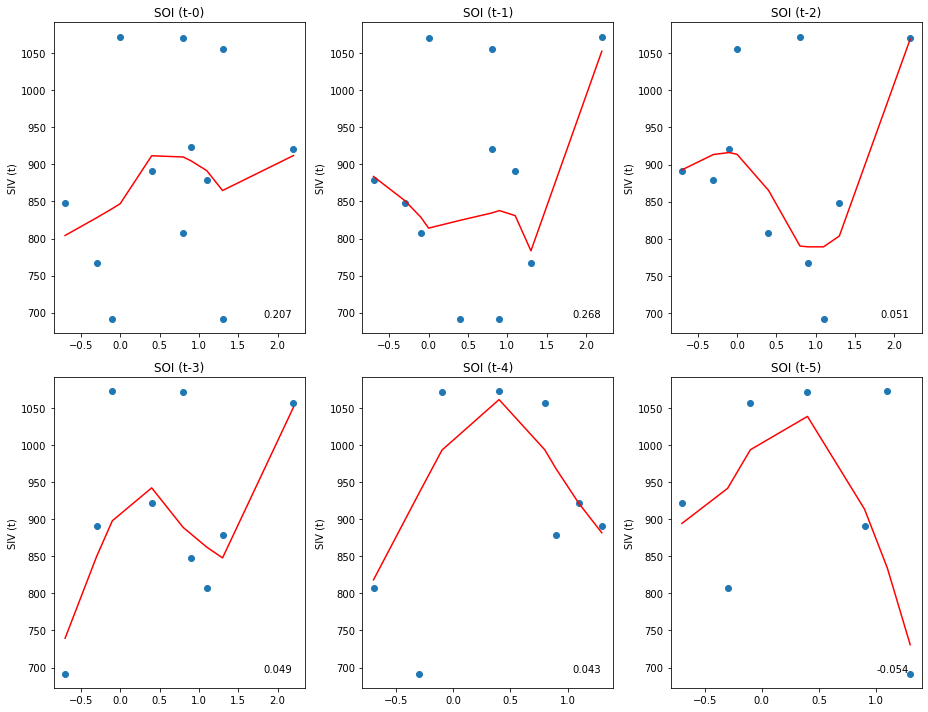

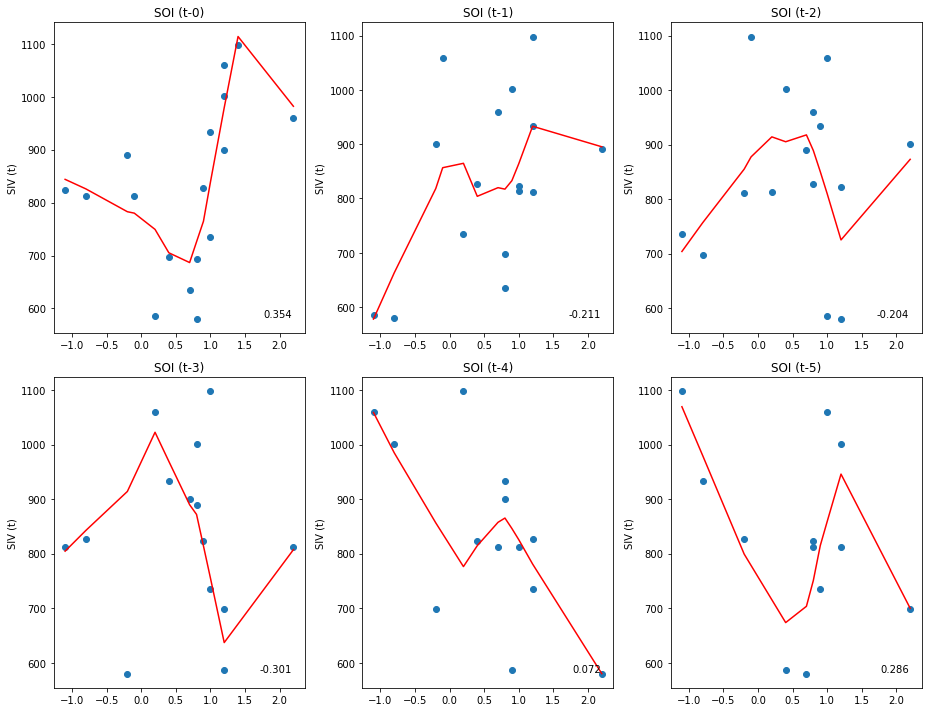

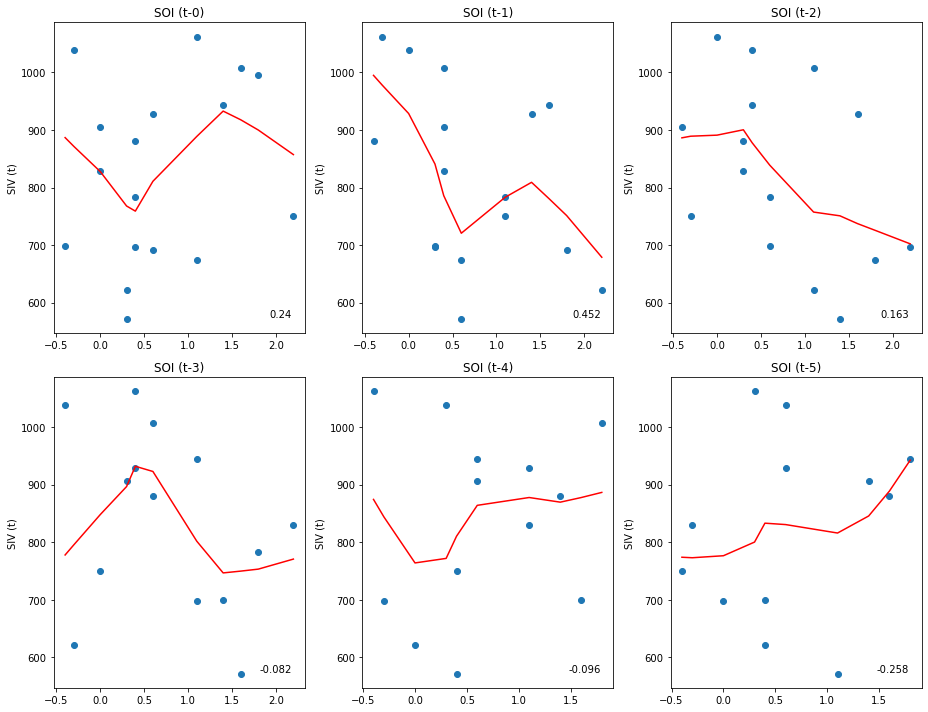

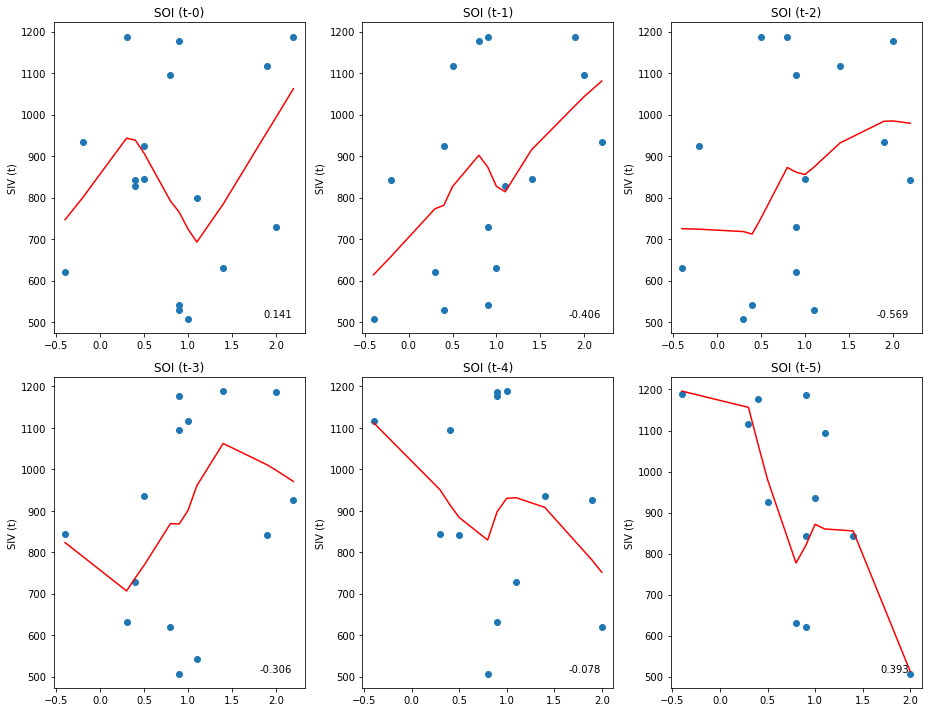

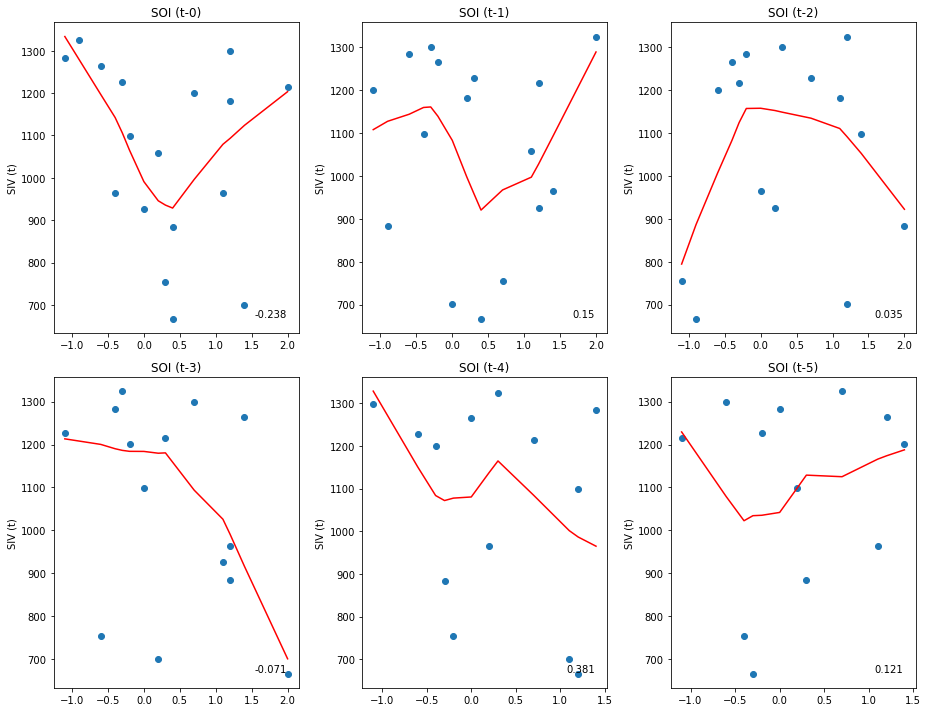

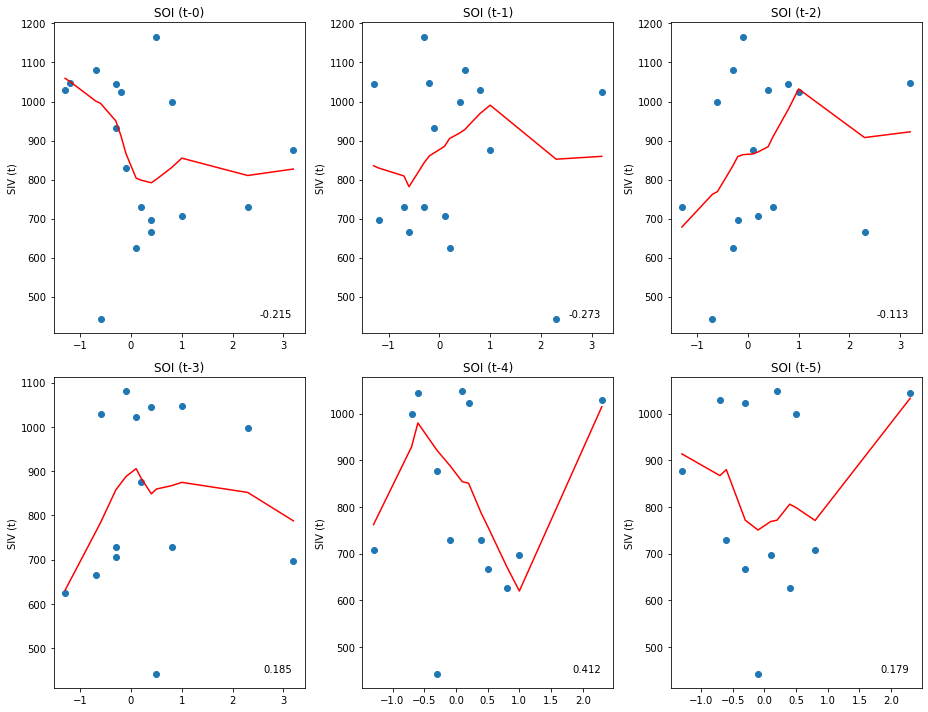

In [17]:
month_ccf_soi(df_new_soi)

## ASL

In [18]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [19]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
#print(asl_df)

In [20]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]
print(asl_df)

            ActCenPres
Dates                 
2002-10-01  986.911499
2003-05-01  967.435608
2003-06-01  985.111511
2003-07-01  969.911377
2003-08-01  972.973511
...                ...
2018-06-01  972.353699
2018-07-01  977.746094
2018-08-01  978.081421
2018-09-01  970.656189
2018-10-01  965.293152

[97 rows x 1 columns]


In [21]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()
print(asl_df)

        Dates  ActCenPres
0  2002-10-01  986.911499
1  2003-05-01  967.435608
2  2003-06-01  985.111511
3  2003-07-01  969.911377
4  2003-08-01  972.973511
..        ...         ...
92 2018-06-01  972.353699
93 2018-07-01  977.746094
94 2018-08-01  978.081421
95 2018-09-01  970.656189
96 2018-10-01  965.293152

[97 rows x 2 columns]


In [22]:
# # Combining the SAM and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["SIV"] = vol_df["SIV"]
print(df_new_asl)

        Dates  ActCenPres          SIV
0  2002-10-01  986.911499   923.753208
1  2003-05-01  967.435608   691.286389
2  2003-06-01  985.111511   767.113866
3  2003-07-01  969.911377   847.812585
4  2003-08-01  972.973511   879.269180
..        ...         ...          ...
92 2018-06-01  972.353699   706.945553
93 2018-07-01  977.746094   875.894342
94 2018-08-01  978.081421  1023.412510
95 2018-09-01  970.656189  1048.017796
96 2018-10-01  965.293152   697.573498

[97 rows x 3 columns]


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_asl(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_asl_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.ActCenPres, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_asl_selmon = df_selmon[['Dates', 'ActCenPres']]
        df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
        df_asl_selmon = df_asl_selmon.set_index(['Dates'])
        df_asl_selmons.append(df_asl_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_asl_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_asl_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"ASL (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


         CCF
0   0.303389
1   0.240305
2   0.052756
3  -0.230184
4  -0.317820
5   0.235468
6   0.040789
7  -0.085535
8   0.052977
9  -0.001793
10 -0.078104
11  0.141167
12  0.095718
13 -0.179486
14  0.026982
15  0.010730
         CCF
0   0.111757
1  -0.143558
2   0.064848
3  -0.151850
4   0.139311
5  -0.020985
6   0.086652
7   0.077201
8   0.021043
9  -0.049509
10  0.015182
11 -0.059138
12 -0.019797
13  0.000027
14 -0.045813
15  0.026156
         CCF
0   0.211740
1   0.266016
2   0.003122
3   0.230980
4  -0.387487
5   0.233788
6  -0.298936
7   0.141142
8  -0.057987
9   0.079284
10  0.075219
11 -0.095555
12  0.105308
13 -0.099091
14  0.011083
15 -0.013773
         CCF
0  -0.026667
1  -0.220344
2   0.280541
3  -0.643314
4   0.305442
5   0.045120
6  -0.116424
7   0.254427
8  -0.148998
9   0.323681
10 -0.204609
11  0.150646
12  0.095648
13 -0.121204
14  0.085848
15 -0.046299
         CCF
0   0.192119
1  -0.367401
2   0.067007
3  -0.311297
4  -0.211301
5  -0.292261
6  -0.120574
7  -0.034411

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/2568138697.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/2568138697.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_82488/2568138697.py:27: SettingWithCopyWarning: 
A value is try

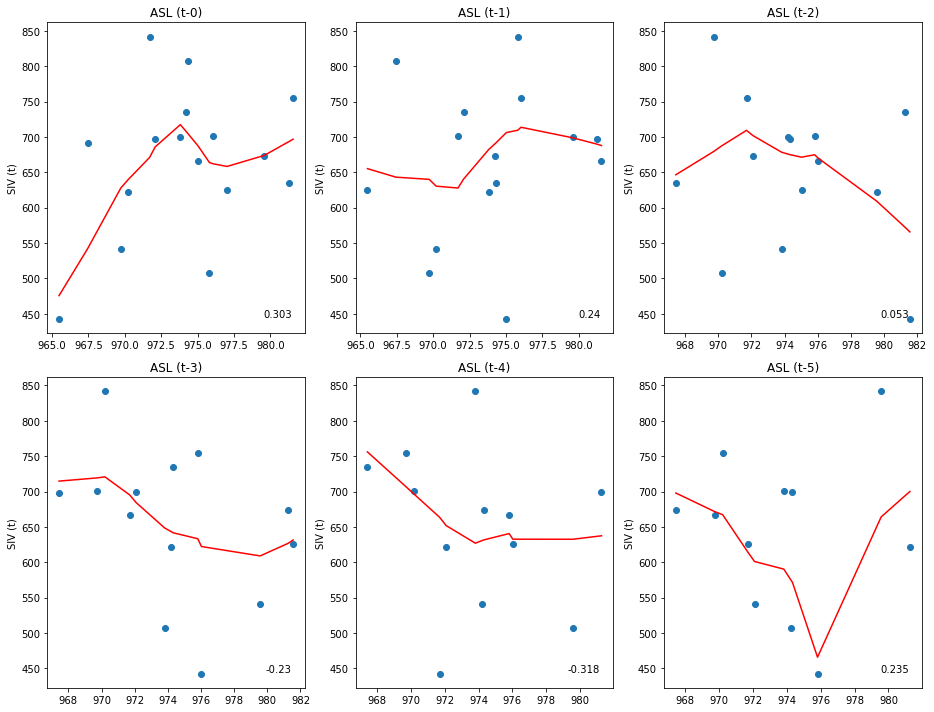

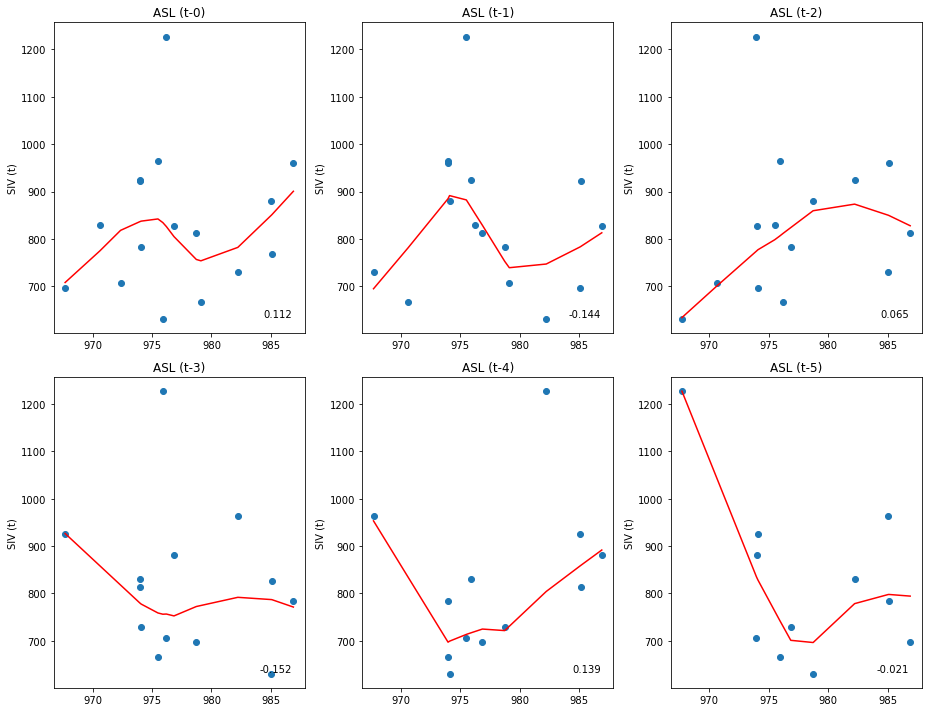

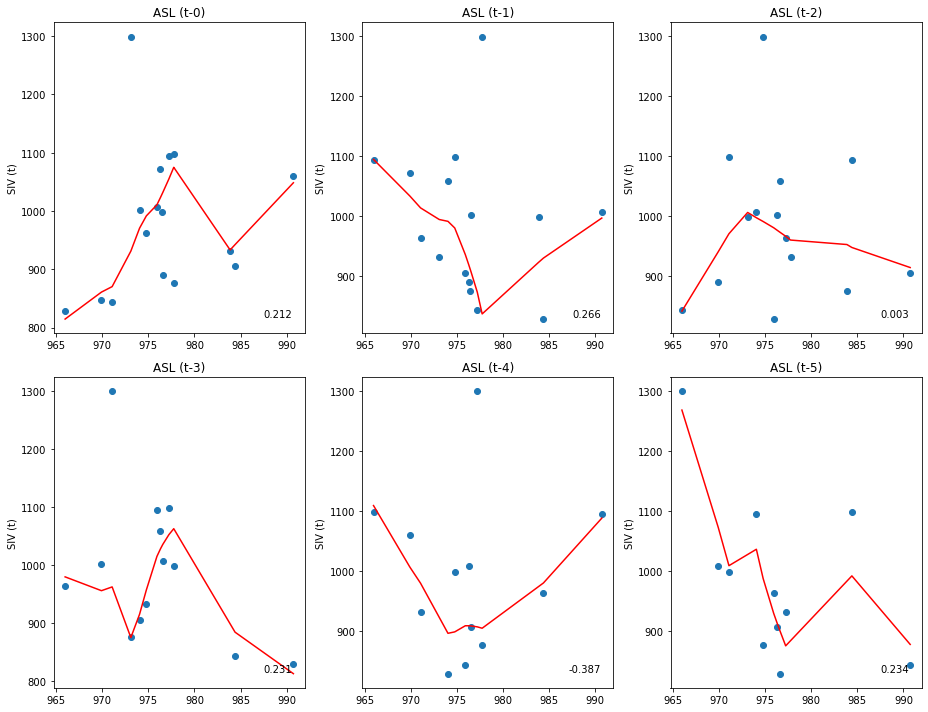

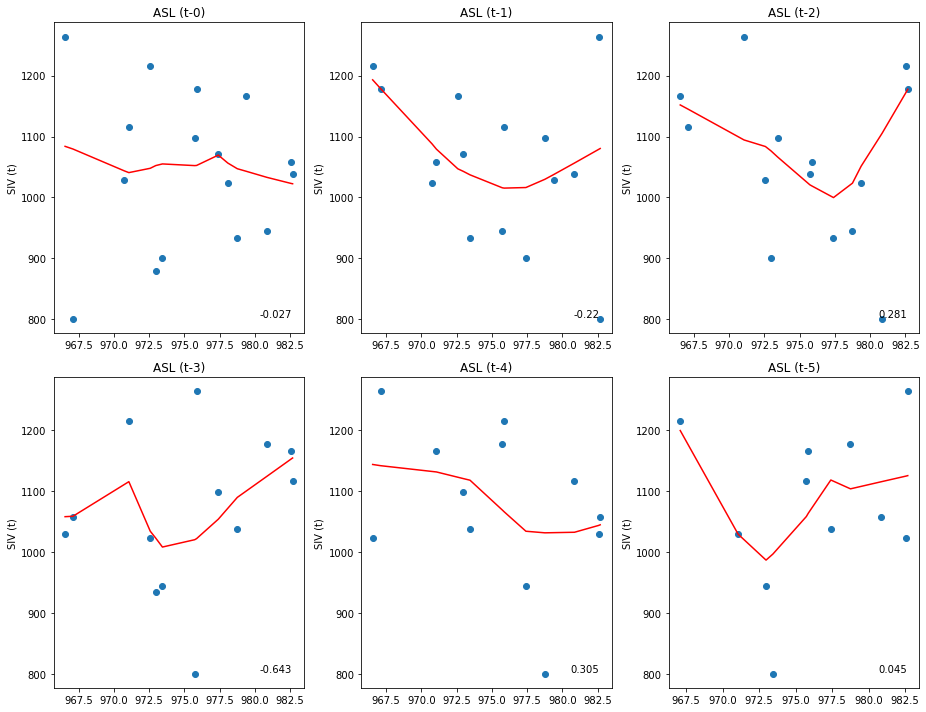

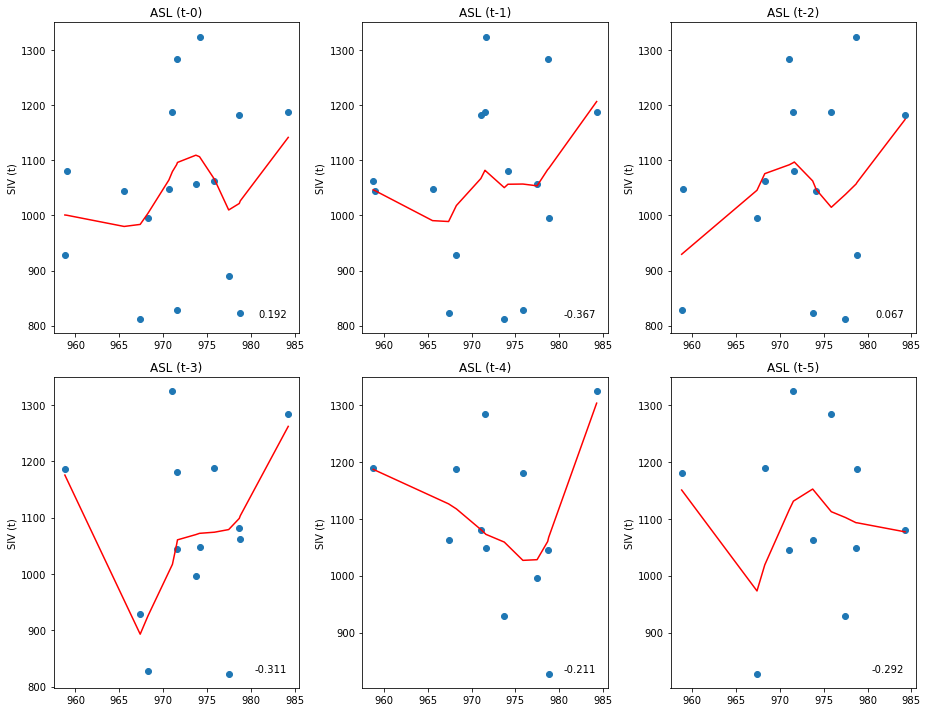

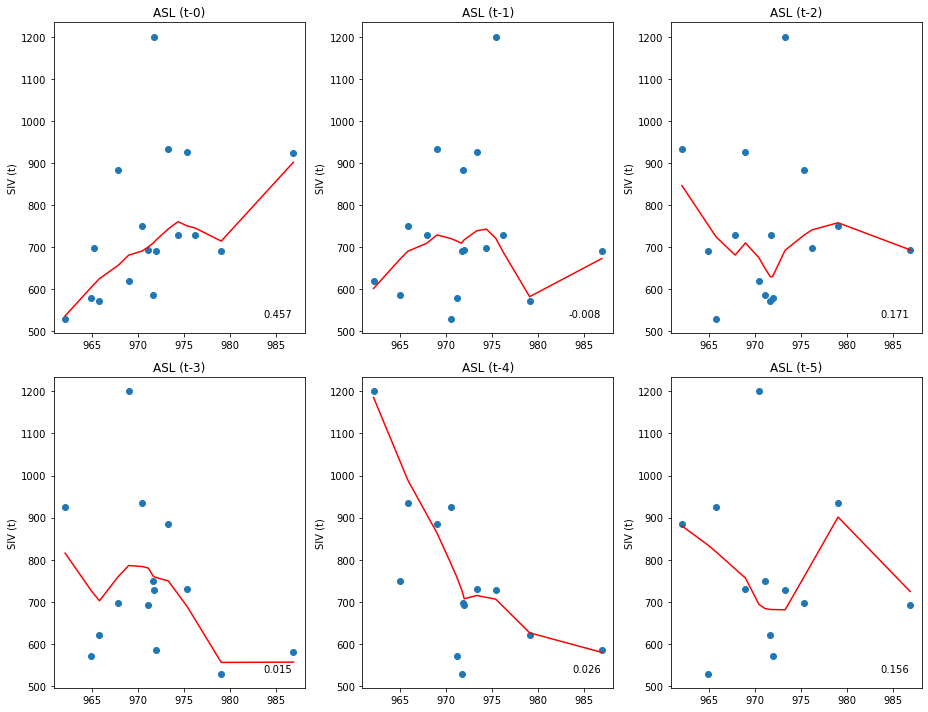

In [24]:
month_ccf_asl(df_new_asl)